# Exercise 1: **Visualising Data and Computing Correlations**


### Basics of Biomedical Data Analysis

**Stephane Deny**: stephane.deny@aalto.fi

**Carlos Sevilla Salcedo**: carlos.sevillasalcedo@aalto.fi

**Hyunkyung Choo**: hyunkyung.choo@aalto.fi

<br></br>
<center><img src="https://drive.google.com/uc?export=view&id=1pKi7IMOOe_huyEyBTj4mfAEF6EJ_kdp2" width="40%">
</center>

In neuroscience, experimental technologies allow the simultaneous recording of large numbers of neurons, but visualising and analysing these high-dimensional neuronal trajectories can be challenging. In this problem, you will visualise the activity of a population of neurons, compute and represent means, error bars and correlations.

As you progress through this notebook, you will be asked to complete some question. Each question includes an explanation of what is expected, followed by a code cell to fill in. You can use more than one code cell if necessary.

# 1. Dataset description

In this section, we present the database we will be working with for the next two exercise sessions. The data was collected from a set of experiments for which a **monkey** was instructed to move a **manipulandum**, which is an exoskeleton that fits over the arm and constrains movement to a 2D plane.
Think of the manipulandum as a joystick controlled by the whole arm.
<br></br>
<center>
        <img src="https://drive.google.com/uc?export=view&id=1bVNxldIybZ1_gTKp-QMkRnE8Ofw9VAhc" width="25%"><br></br>
<em>Figure 1.</em> Diagram of a manipulandum
</center>
   
The behavioural task was the center-out paradigm pioneered by Georgopoulos
and colleagues (1982). The monkey fist **holds the cursor over the center target for 500 ms**. Then, a peripheral target appears at one of **eight locations arranged in a circle** around the center target.
<br></br>
<center> <img src="https://drive.google.com/uc?export=view&id=1zlTf4TQ-l3YkzXjuAkxKduj3l075J_ym" width="25%"><br></br>
    <em>Figure 2.</em> A monkey operating a manipulandum.
</center>


In our task, there is an **instructed delay**, which means that after the peripheral target appears, the monkey must **wait approximately 1-2 s for a go cue**. After the go cue, the monkey moves its hand to the peripheral target and **holds for 500 ms**, and the trial is completed.
<br></br>
<center>
    <img src="https://drive.google.com/uc?export=view&id=1xhCmmgc6yVtzJk4jMyMDq_7KMW2fmOX9" width="25%"><br></br>
    <em>Figure 3.</em> Hand trajectories for a center-out reach task.
</center>

The population of neurons that you will analyse was recorded from **motor (M1) and pre-motor (PMd) brain areas** of a monkey performing this center-out reaching task. These data are adapted from an assignment for Nicho Hatsopoulos Computational Neuroscience course at University of Chicago.

<br></br>
<center>
    <img src="https://drive.google.com/uc?export=view&id=1CxKOkJZMiOYJ5vLHOxgjFoDVmTFSHeuO" width="25%"><br></br><br></br>
    <em>Figure 4.</em> The dorsal premotor cortex (PMd) is involved in selecting motor programs to prepare motor actions. The primary motor cortex (M1) is involved in executing these motor programs (source: https://www.jneurosci.org/content/26/24/6397).
</center>

# 1.1. Data loading

The data with the neural activity you will use is stored in `HatsopoulosReachTask.mat`. The next code cell loads this file with the following variables:
- `numNeurons`, `numTimebins`, `numTrials`
- `firingRate` (`numNeurons x numTimebins x numTrials`): firing rate of each neuron, in each time bin, on each trial.
- `dt`: length of each time bin in seconds.
- `cueTime`, `goTime`: time of the instruction cue and the go signal in seconds.
- `direction` (`1 x numTrials`): the direction of the reach (takes values from 1-8, starting from 0º, then 45º, on to 315º).
- `brainRegion` (`1 x numNeurons`): either *'M1'* (motor area) or *'PMd'* (pre-motor area).

In [1]:
### Load required python libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
%matplotlib inline

#We first load the .mat file
data = scipy.io.loadmat('HatsopoulosReachTask.mat')
#Then, we store the features in dictionary `data` in their corresponding variables
direction = np.squeeze(np.array(data['direction']))
firingRate = np.squeeze(np.array(data['firingRate']))
brainRegion = np.squeeze(data['brainRegion'])
goTime = np.squeeze(data['goTime'])
cueTime = float(np.squeeze(data['cueTime']))
dt = float(np.squeeze(data['dt']))
numNeurons = int(data['numNeurons'])
numTimebins = int(data['numTimebins'])
numTrials = int(data['numTrials'])

# 2. Data visualisation


We start by visualising some of the dataset variables, and in particular `firingRate`.

> **Question 1:** Plot the **mean activity** over all neurons for each of the **8 reach directions**, as a function of time (i.e. temporal traces). Do this in two figures, one for **each brain region** (*'PMd'* and *'M1'*). Add **x-labels** (in seconds), **y-labels** (in firing rate per second), and **legends** to the plots. Plot the **95% confidence interval** around these means as shaded error bars. Represent the **cue time** as a vertical bar. Plot curves with `linewidth = 2`.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


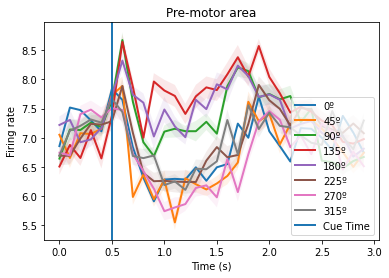

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


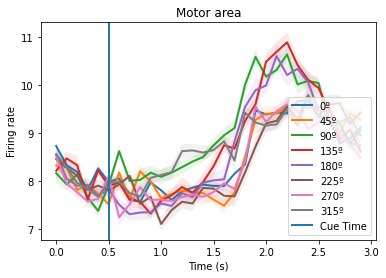

In [44]:
#Let's do the figures first for PMd region
t = np.arange(0,dt*30,dt)
angle_str = [str(a) + 'º' for a in np.arange(0,360,45)]

PMd = firingRate[brainRegion == 'PMd',:,:]
PMd_mean = np.zeros((8,PMd.shape[1]))

fig, ax = plt.subplots()
for direction_idx in range(0,8):
  PMd_mean[direction_idx-1,:] = np.mean(np.mean(PMd[:,:,direction==direction_idx+1],axis=2),axis=0)
  ax.plot(t, PMd_mean[direction_idx-1,:], linewidth = 2, label=angle_str[direction_idx])
  #Next let's start working with the Confidence Interval
  ConfidenceInterval = 2*np.std(np.mean(PMd[:,:,direction == direction_idx], axis=0),axis=1)/np.sqrt(PMd.shape[2])
  ax.fill_between(t, PMd_mean[direction_idx-1,:] + ConfidenceInterval, PMd_mean[direction_idx-1,:] - ConfidenceInterval, alpha = 0.1)
ax.axvline(x = cueTime, label = 'Cue Time', linewidth = 2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Firing rate')
plt.legend(loc='lower right')
plt.title('Pre-motor area')
plt.show()



#Now the same for M1 region
MI = firingRate[brainRegion == 'MI',:,:]
MI_mean = np.zeros((8,MI.shape[1]))
fig, ax = plt.subplots()

for direction_idx in range(0,8):
  MI_mean[direction_idx-1,:] = np.mean(np.mean(MI[:,:,direction==direction_idx+1],axis=2),axis=0)
  ax.plot(t, MI_mean[direction_idx-1,:], linewidth = 2, label=angle_str[direction_idx])
  ConfidenceInterval = 2*np.std(np.mean(MI[:,:,direction == direction_idx], axis=0),axis=1)/np.sqrt(MI.shape[2])
  ax.fill_between(t, MI_mean[direction_idx-1,:] + ConfidenceInterval, MI_mean[direction_idx-1,:] - ConfidenceInterval, alpha = 0.1)
ax.axvline(x = cueTime, label = 'Cue Time', linewidth = 2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Firing rate')
plt.legend(loc='lower right')
plt.title('Motor area')
plt.show()



In [ ]:
#FIND SOME HELP HERE

#Vector of time samples
t = np.arange(0,dt*30,dt)
#Angle labels for the plot legend
angle_str = [str(a) + 'º' for a in np.arange(0,360,45)] 

####################### PMd #######################
#Store the values that correspond to the 'PMd' brainRegion
PMd = firingRate[brainRegion == 'PMd',:,:]
#Define a matrix to store the mean value in each direction
PMd_mean = np.zeros((8,PMd.shape[1]))

#Plot the mean value and confidence interval of neuron activities for each direction
fig, ax = plt.subplots()
for direction_idx in np.range(8):
    #Plot the mean value
    PMd_mean[direction_idx,:] = #<FILL IN>
    ax.plot(#<FILL IN>)
    #Plot the confidence interval
    ConfidenceInterval = #<FILL IN>
    ax.fill_between(#<FILL IN>)
ax.axvline(#<FILL IN>)
ax.set_xlabel(#<FILL IN>)
ax.set_ylabel(#<FILL IN>)
plt.legend()
plt.title('Pre-motor area')
plt.show()

####################### M1 ########################
#Make an equivalent plot for M1

> Do you observe significant differences in neural activities between the different reach directions? 

#YOUR ANSWER HERE


# 3. Correlation between neural activities

In the last section, we have visualised the average firing rate for the different reach directions. Here, we focus on how the neural activities for different reach directions correlate with each other.

> **Question 2:** Compute the correlation coefficient between the temporal traces--averaged over neurons--for different reach directions, and represent these coefficients in a 8x8 heatmap, representing all pairs of correlations between the 8 reach directions. Do it separately for the premotor region (PMd) and the motor region (M1). Make sure the range of the colorbar is between -1 and 1. Use the 'seismic' colormap.

**Note:** Compute the correlation coefficient yourself using this equation:
$$R = \frac{\sum_{i = 1}^N (x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\sum_i (x_i - \mu_x)^2}\sqrt{\sum_i (y_i - \mu_y)^2}}$$

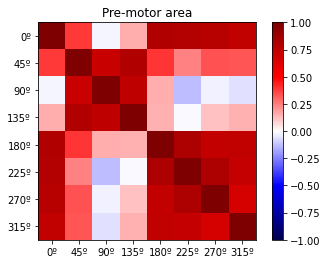

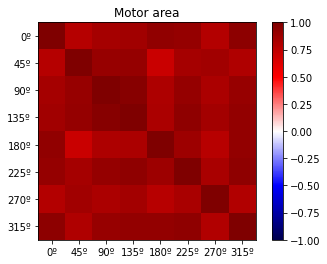

In [46]:
#Correlations between neural activities for different directions
PMd_corcof = np.zeros((8,8))
MI_corcof = np.zeros((8,8))
for i in np.arange(8):
  for j in np.arange(8):
    PMd_corcof[i,j] = np.corrcoef(PMd_mean[i,:],PMd_mean[j,:])[0,1]
    MI_corcof[i,j] = np.corrcoef(MI_mean[i,:],MI_mean[j,:])[0,1]

plt.imshow(PMd_corcof, cmap = 'seismic', vmax = 1, vmin = -1)
plt.xticks(np.arange(8), angle_str)
plt.yticks(np.arange(8), angle_str)
plt.colorbar()
plt.title('Pre-motor area')
plt.show()

plt.imshow(MI_corcof, cmap = 'seismic', vmax = 1, vmin = -1)
plt.xticks(np.arange(8), angle_str)
plt.yticks(np.arange(8), angle_str)
plt.colorbar()
plt.title('Motor area')
plt.show()


In [47]:
#FIND SOME HELP HERE

#Compute the correlation between neural activities for different directions
# <FILL IN>

#Plot the corresponding correlation matrix
plt.imshow(# <FILL IN>)
plt.xticks(np.arange(8), angle_str)
plt.yticks(np.arange(8), angle_str)
plt.colorbar()
plt.title('Pre-motor area')
plt.show()

plt.imshow(# <FILL IN>)
plt.xticks(np.arange(8), angle_str)
plt.yticks(np.arange(8), angle_str)
plt.colorbar()
plt.title('Motor area')
plt.show()

SyntaxError: ignored

> Do you find strong correlations? What does it say about the neural activity of each of these regions during this task?

#YOUR ANSWER HERE

# 4. Correlation between brain regions

Finally, we explore the correlation of activity between the two different brain regions.

> **Question 3:** Compute the correlation heatmap between the two regions.

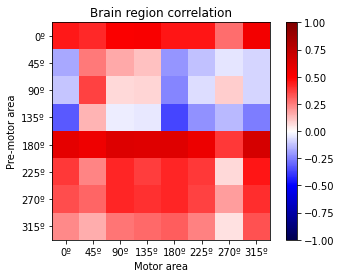

In [48]:
#This question is similar to Question 2, so we can follow the same code structure
PMd_MI_corrcoef = np.zeros((8,8))
for i in np.arange(8):
  for j in np.arange(8):
    PMd_MI_corrcoef[i,j] = np.corrcoef(PMd_mean[i,:], MI_mean[j,:])[0,1]

plt.imshow(PMd_MI_corrcoef, cmap = 'seismic', vmin = -1, vmax = 1)
plt.xticks(np.arange(8), angle_str)
plt.yticks(np.arange(8), angle_str)
plt.ylabel('Pre-motor area')
plt.xlabel('Motor area')
plt.colorbar()
plt.title('Brain region correlation')
plt.show()


In [ ]:
#FIND SOME HELP HERE

#Compute the correlation between neural activities for different directions
# <FILL IN>

#Plot the corresponding correlation matrix
plt.imshow(# <FILL IN>)
plt.xticks(np.arange(8), dir_str) #angle_str
plt.yticks(np.arange(8), dir_str) #angle_str
plt.ylabel('Pre-motor area')
plt.xlabel('Motor area')
plt.colorbar()
plt.title('Brain region correlation')
plt.show()

> Do you find strong correlations? What does it say about the function of these regions during this task?

#YOUR ANSWER HERE

# 5. (Optional*) Direction decoding
*No extra points for doing this exercise



> **Question 4:** Train a linear decoder to decode the reach direction from the neural activity. Can you decode the reach direction from *'PMd'*? and from *'M1'*? At what point in time does your decoder become reliable?